### Importación de datos



In [57]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [58]:
sumaTienda = tienda["Precio"].sum().astype(float)
print(f"El total de la suma de las ventas de la primera tienda es: ${sumaTienda} pesos colombianos\n")

sumaTienda2 = tienda2["Precio"].sum().astype(float)
print(f"El total de la suma de las ventas de la segunda tienda es: ${sumaTienda2} pesos colombianos\n")

sumaTienda3 = tienda3["Precio"].sum().astype(float)
print(f"El total de la suma de las ventas totales de la tercera tienda es: ${sumaTienda3} pesos colombianos\n")

sumaTienda4 = tienda4["Precio"].sum().astype(float)
print(f"El total de la suma de las ventas totales de la tercera tienda es: ${sumaTienda4} pesos colombianos")

El total de la suma de las ventas de la primera tienda es: $1150880400.0 pesos colombianos

El total de la suma de las ventas de la segunda tienda es: $1116343500.0 pesos colombianos

El total de la suma de las ventas totales de la tercera tienda es: $1098019600.0 pesos colombianos

El total de la suma de las ventas totales de la tercera tienda es: $1038375700.0 pesos colombianos


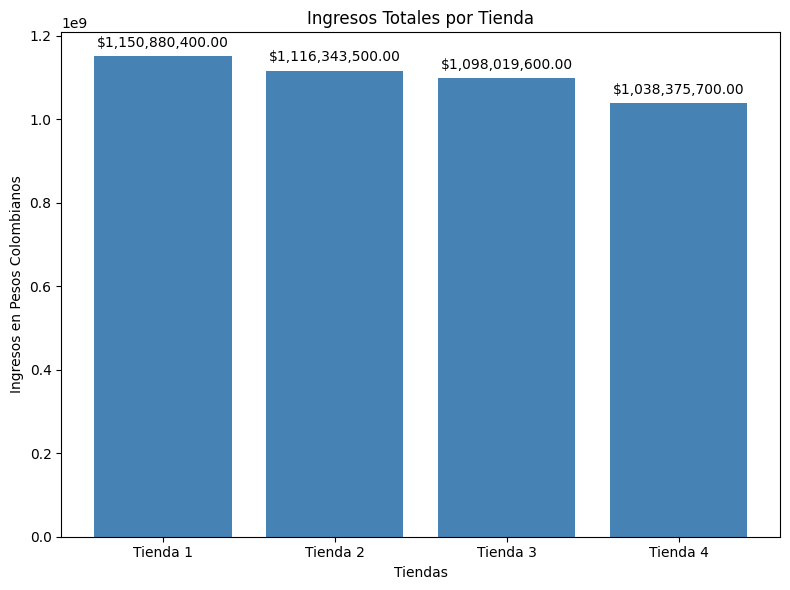

In [59]:
totales = [sumaTienda, sumaTienda2, sumaTienda3, sumaTienda4]
nombresTiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 6))
plt.bar(nombresTiendas, totales, color='steelblue')
plt.title("Ingresos Totales por Tienda")
plt.ylabel("Ingresos en Pesos Colombianos")
plt.xlabel("Tiendas")

for i, total in enumerate(totales):
  plt.text(i, total + max(totales)*0.02, f"${total:,.2f}", ha='center')

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [60]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombresTiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for nombre_tienda, tienda in zip(nombresTiendas, tiendas):
  print(f"{nombre_tienda}:\n")

  ventasCategoria = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad_Ventas').sort_values(by='Cantidad_Ventas', ascending=False)

  print(f"{ventasCategoria}\n")

Tienda 1:

    Categoría del Producto  Cantidad_Ventas
7                  Muebles              465
3             Electrónicos              448
5                 Juguetes              324
2        Electrodomésticos              312
1     Deportes y diversión              284
4   Instrumentos musicales              182
6                   Libros              173
0  Artículos para el hogar              171

Tienda 2:

    Categoría del Producto  Cantidad_Ventas
7                  Muebles              442
3             Electrónicos              422
5                 Juguetes              313
2        Electrodomésticos              305
1     Deportes y diversión              275
4   Instrumentos musicales              224
6                   Libros              197
0  Artículos para el hogar              181

Tienda 3:

    Categoría del Producto  Cantidad_Ventas
7                  Muebles              499
3             Electrónicos              451
5                 Juguetes              3

Aqui una representacion grafica de las 4 tiendas con sus categorias populares en el cual se puede observar que entre las populares se encuentran Muebles y Electrónicos:



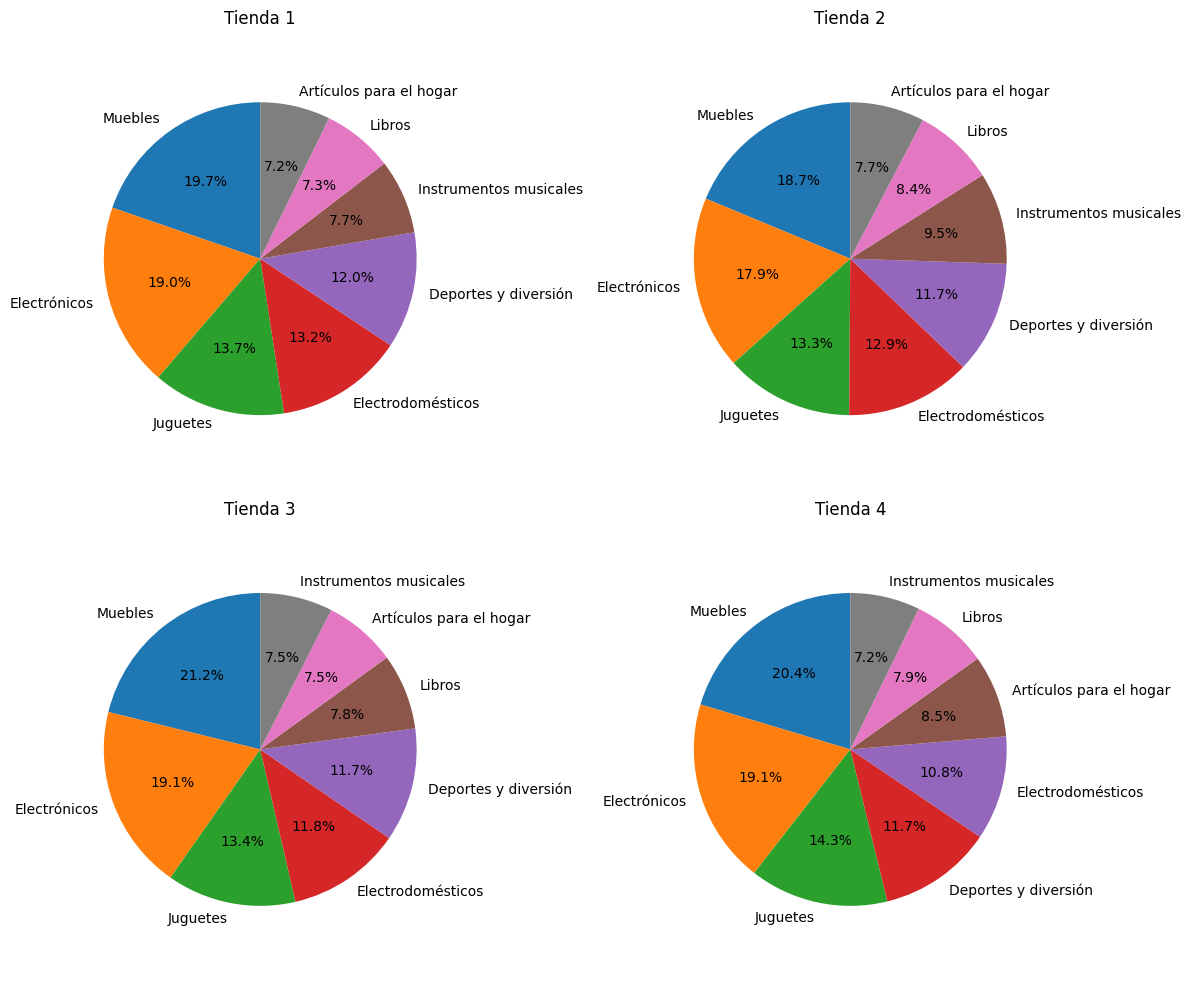

In [ ]:
print("Aquí una representación gráfica de las 4 tiendas con sus categorías populares en el cual se puede observar que entre las populares se encuentran Muebles y Electrónicos:\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (nombre_tienda, tienda) in enumerate(zip(nombresTiendas, tiendas)):
  ventasCategoria = tienda.groupby('Categoría del Producto').size().reset_index(name='Cantidad_Ventas').sort_values(by='Cantidad_Ventas', ascending=False)

  categorias = ventasCategoria['Categoría del Producto']
  cantidades = ventasCategoria['Cantidad_Ventas']

  axes[i].pie(cantidades, labels=categorias, autopct='%1.1f%%', startangle=90)
  axes[i].set_title(nombre_tienda)
  axes[i].axis('equal')

plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [62]:
valoracionMediaT = tienda["Calificación"].mean()
print(f"La valoracion media de la primera tienda es: {valoracionMediaT}\n")

valoracionMediaT2 = tienda2["Calificación"].mean()
print(f"La valoracion media de la segunda tienda es: {valoracionMediaT2}\n")

valoracionMediaT3 = tienda3["Calificación"].mean()
print(f"La valoracion media de la tercera tienda es: {valoracionMediaT3}\n")

valoracionMediaT4 = tienda4["Calificación"].mean()
print(f"La valoracion media de la cuarta tienda es: {valoracionMediaT4}\n")

La valoracion media de la primera tienda es: 3.9957591178965224

La valoracion media de la segunda tienda es: 4.037303942348453

La valoracion media de la tercera tienda es: 4.048325561678677

La valoracion media de la cuarta tienda es: 3.9957591178965224



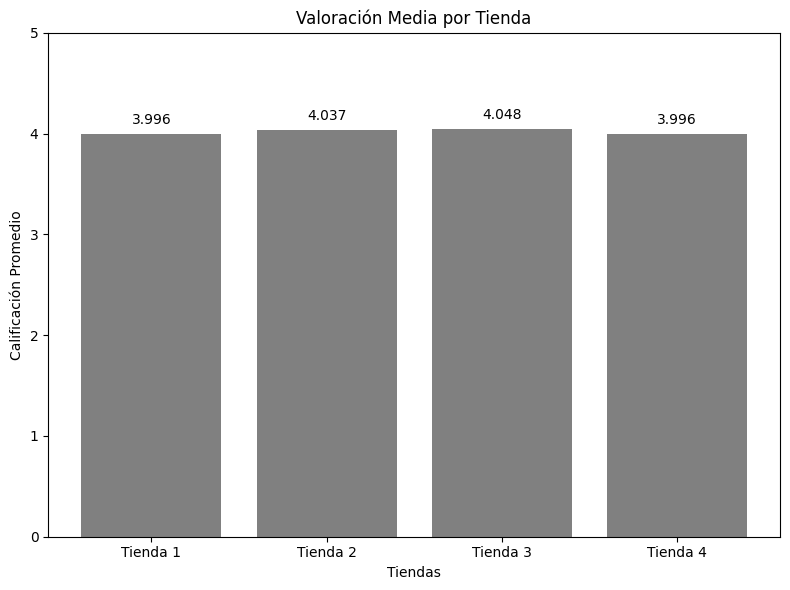

In [63]:
promedios = [valoracionMediaT, valoracionMediaT2, valoracionMediaT3, valoracionMediaT4]

plt.figure(figsize=(8, 6))
plt.bar(nombresTiendas, promedios, color='grey')
plt.title("Valoración Media por Tienda")
plt.ylabel("Calificación Promedio")
plt.xlabel("Tiendas")
plt.ylim(0, 5)

for i, valor in enumerate(promedios):
    plt.text(i, valor + 0.1, f"{valor:.3f}", ha='center')

plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

In [64]:
for nombre_tienda, tienda in zip(nombresTiendas, tiendas):
  print(f"\n{nombre_tienda}:")

  ventasProducto = tienda.groupby('Producto').size().reset_index(name='Cantidad_Ventas')
  ventasOrdenadas = ventasProducto.sort_values(by='Cantidad_Ventas', ascending=False)

  print("Top 3 productos más vendidos:")
  print(f"{ventasOrdenadas.head(3)}\n")

  print("Top 3 productos menos vendidos:")
  print(ventasOrdenadas.tail(3))


Tienda 1:
Top 3 productos más vendidos:
         Producto  Cantidad_Ventas
1         Armario               60
48  TV LED UHD 4K               60
33     Microondas               60

Top 3 productos menos vendidos:
                     Producto  Cantidad_Ventas
37            Olla de presión               35
13               Celular ABXY               33
4   Auriculares con micrófono               33

Tienda 2:
Top 3 productos más vendidos:
                     Producto  Cantidad_Ventas
24  Iniciando en programación               65
33                 Microondas               62
7                     Batería               61

Top 3 productos menos vendidos:
           Producto  Cantidad_Ventas
23        Impresora               34
31  Mesa de comedor               34
26    Juego de mesa               32

Tienda 3:
Top 3 productos más vendidos:
           Producto  Cantidad_Ventas
27    Kit de bancas               57
31  Mesa de comedor               56
11        Cama king               56

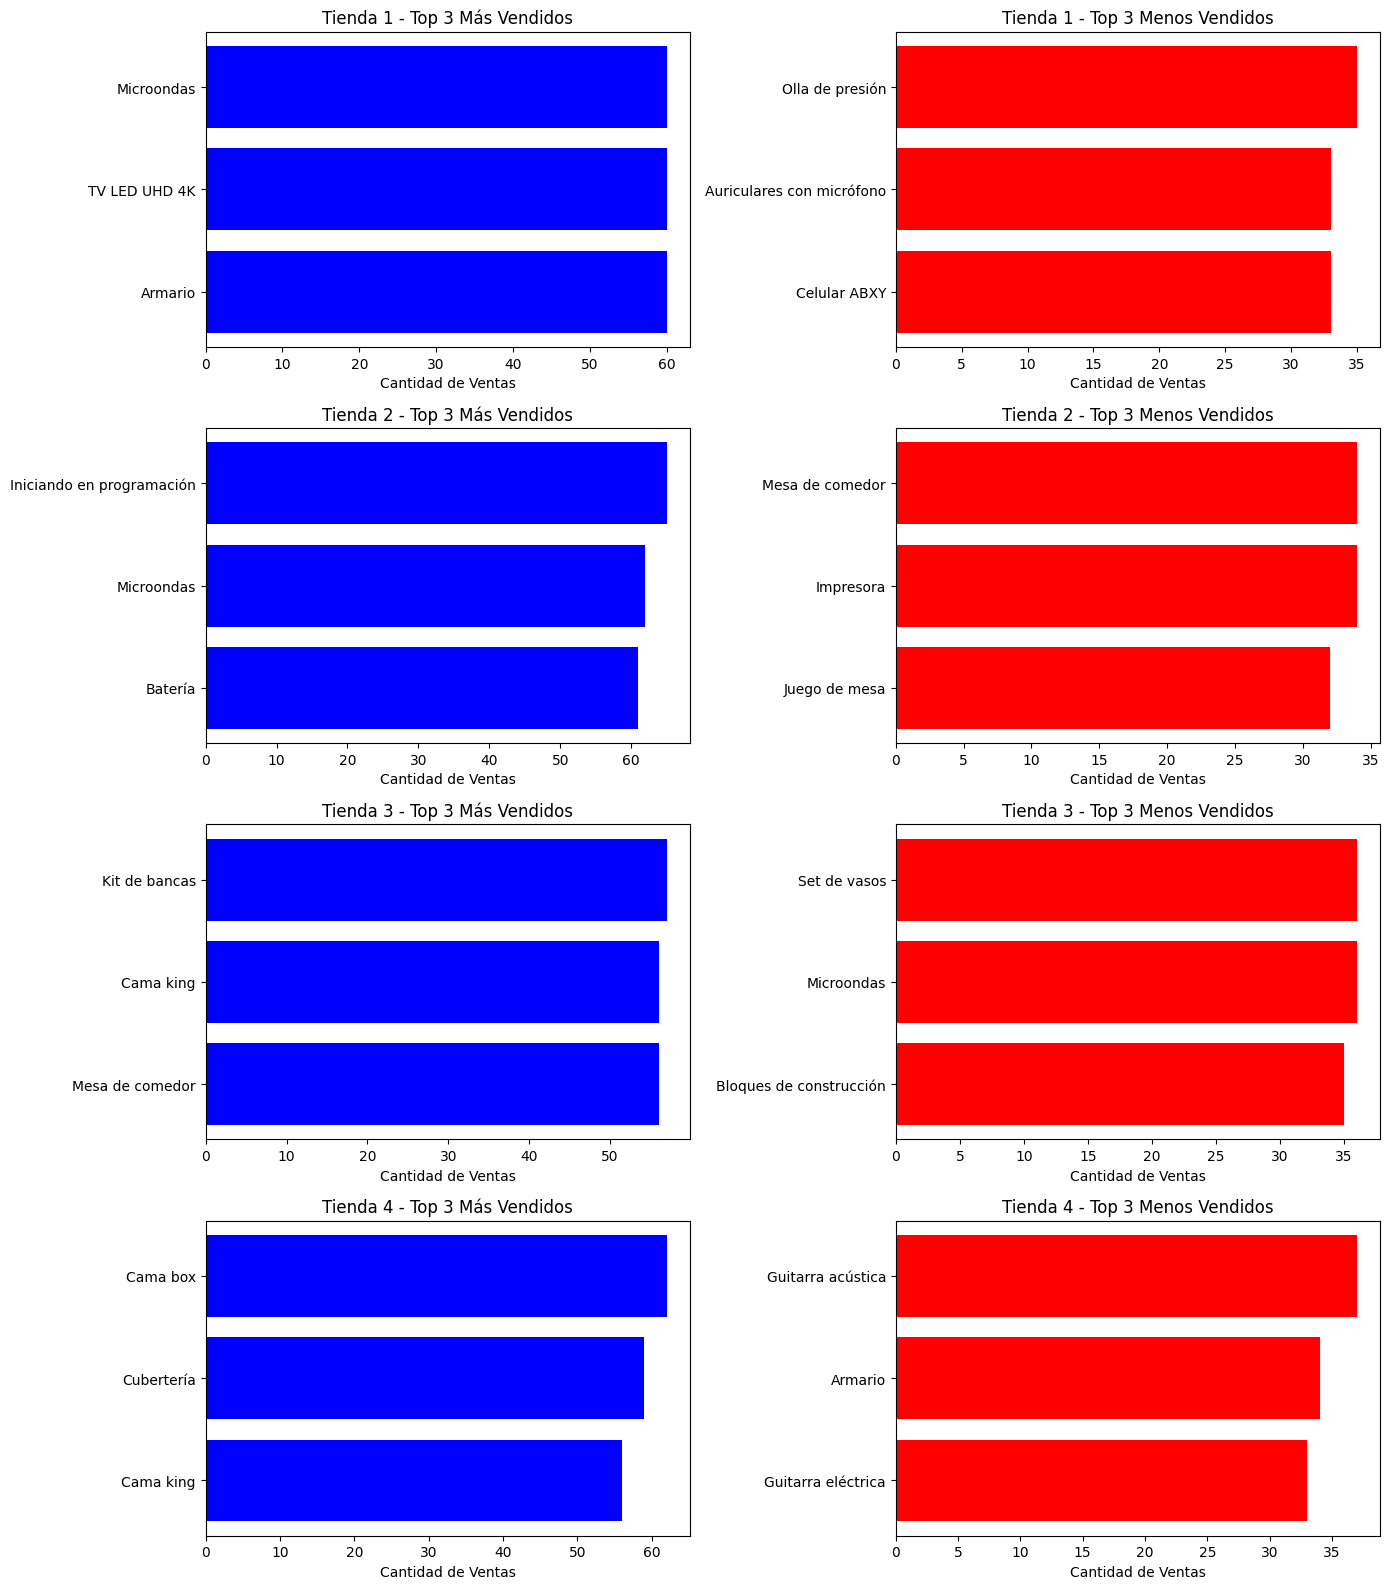

In [65]:
fig, axes = plt.subplots(4, 2, figsize=(14, 16))

for i, (nombre_tienda, tienda_df) in enumerate(zip(nombresTiendas, tiendas)):
  ventasProducto = tienda_df.groupby('Producto').size().reset_index(name='Cantidad_Ventas')
  ventasOrdenadas = ventasProducto.sort_values(by='Cantidad_Ventas', ascending=False)

  top_3 = ventasOrdenadas.head(3).sort_values(by='Cantidad_Ventas')
  axes[i][0].barh(top_3['Producto'], top_3['Cantidad_Ventas'], color='blue')
  axes[i][0].set_title(f"{nombre_tienda} - Top 3 Más Vendidos")
  axes[i][0].set_xlabel('Cantidad de Ventas')

  bottom_3 = ventasOrdenadas.tail(3).sort_values(by='Cantidad_Ventas')
  axes[i][1].barh(bottom_3['Producto'], bottom_3['Cantidad_Ventas'], color='red')
  axes[i][1].set_title(f"{nombre_tienda} - Top 3 Menos Vendidos")
  axes[i][1].set_xlabel('Cantidad de Ventas')

plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
for nombre_tienda, tienda in zip(nombresTiendas, tiendas):
  print(f"{nombre_tienda}:")

  promedioEnvio = tienda['Costo de envío'].mean()
  cantidadEnvios = tienda['Costo de envío'].count()

  print(f"El costo promedio de envió de la {nombre_tienda} es: ${promedioEnvio} y una cantidad de envió de: {cantidadEnvios}\n")

Tienda 1:
El costo promedio de envio de la Tienda 1 es: $26018.60958033065 y una cantidad de envios de: 2359

Tienda 2:
El costo promedio de envio de la Tienda 2 es: $25216.235693090293 y una cantidad de envios de: 2359

Tienda 3:
El costo promedio de envio de la Tienda 3 es: $24805.680373039424 y una cantidad de envios de: 2359

Tienda 4:
El costo promedio de envio de la Tienda 4 es: $23459.457167090754 y una cantidad de envios de: 2358



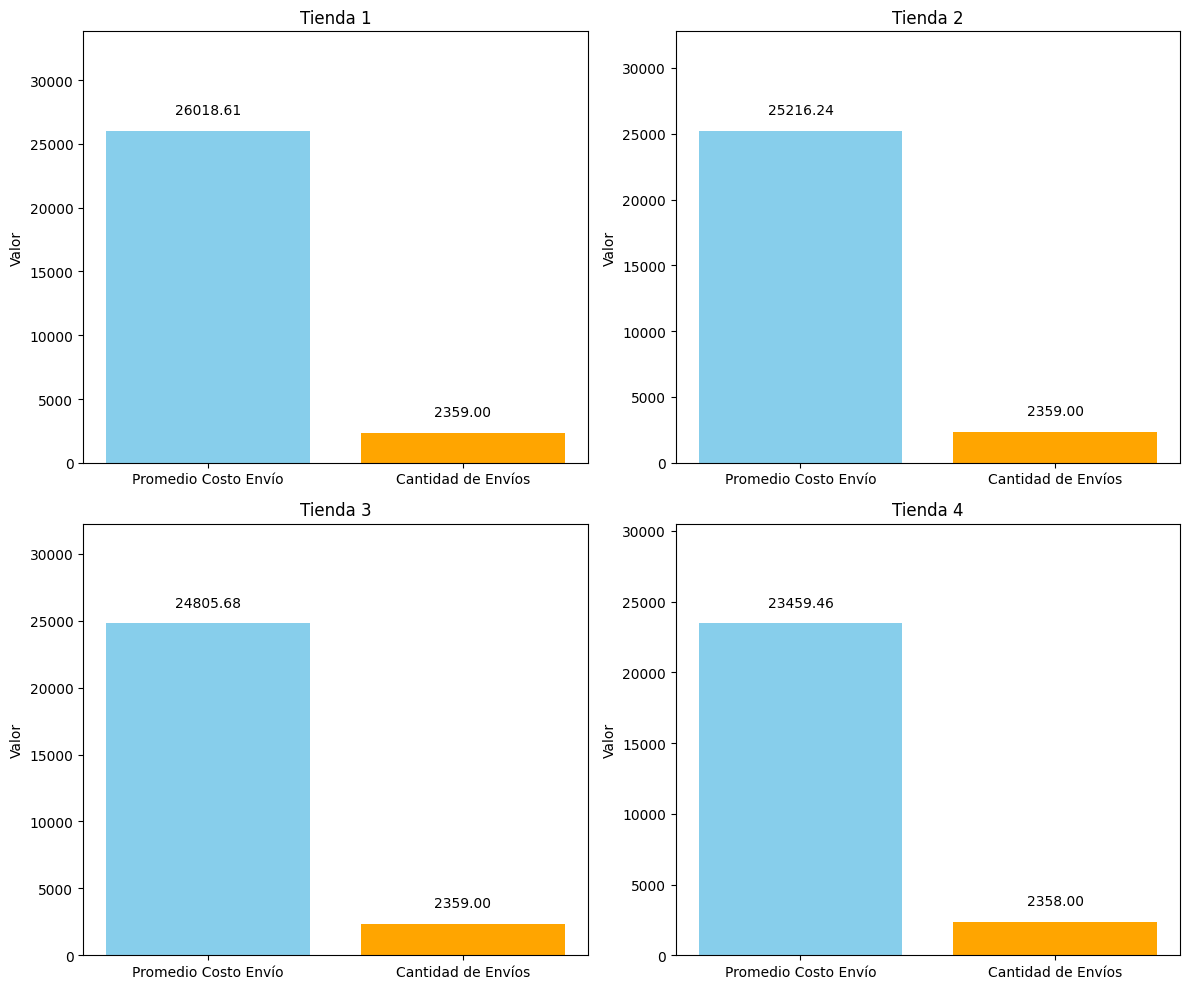

In [67]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, (nombre_tienda, tienda) in enumerate(zip(nombresTiendas, tiendas)):
  promedioEnvio = tienda['Costo de envío'].mean()
  cantidadEnvios = tienda['Costo de envío'].count()

  categorias = ['Promedio Costo Envío', 'Cantidad de Envíos']
  valores = [promedioEnvio, cantidadEnvios]

  colores = ['skyblue', 'orange']
  axes[i].bar(categorias, valores, color=colores)
  axes[i].set_title(nombre_tienda)
  axes[i].set_ylabel("Valor")
  axes[i].set_ylim(0, max(valores)*1.3)

  for j, valor in enumerate(valores):
    axes[i].text(j, valor + max(valores)*0.05, f'{valor:.2f}', ha='center')

plt.tight_layout()
plt.show()

# Conclusión

Después de realizar el análisis de las cuatro tiendas, se concluye que la ***Tienda 4*** es la que se recomienda vender. Aunque tiene el promedio de costo de envío más bajo, no destaca en las demás categorías, presenta los **ingresos totales** más bajos y su **valoración media** es baja, al igual que la de la primera tienda.